101
            BTC/USDT  ETH/USDT  BNB/USDT  SOL/USDT  USDC/USDT  XRP/USDT  \
timestamp                                                                 
2024-03-02 -0.006421 -0.003504  0.008591  0.004558   0.000000  0.071345   
2024-03-03  0.018176  0.019410  0.008761  0.001077   0.000300 -0.026545   
2024-03-04  0.081309  0.040125  0.009409  0.023894  -0.000800  0.032850   
2024-03-05 -0.066256 -0.020429 -0.058078 -0.059728   0.000000 -0.087232   
2024-03-06  0.036878  0.074554  0.089571  0.043732   0.000501  0.035352   
...              ...       ...       ...       ...        ...       ...   
2024-07-29 -0.021468  0.014525 -0.016441 -0.012601   0.000100  0.001164   
2024-07-30 -0.008935 -0.011589  0.024203 -0.018678   0.000300  0.042864   
2024-07-31 -0.023569 -0.014171 -0.019891 -0.041583   0.000000 -0.007488   
2024-08-01  0.011234 -0.009076 -0.002428 -0.025275   0.000500 -0.042697   
2024-08-02 -0.010134 -0.016305 -0.003999 -0.017267   0.000000 -0.037726   

            DOGE/USD

<Axes: title={'center': 'Portfolio Performance'}, xlabel='timestamp'>

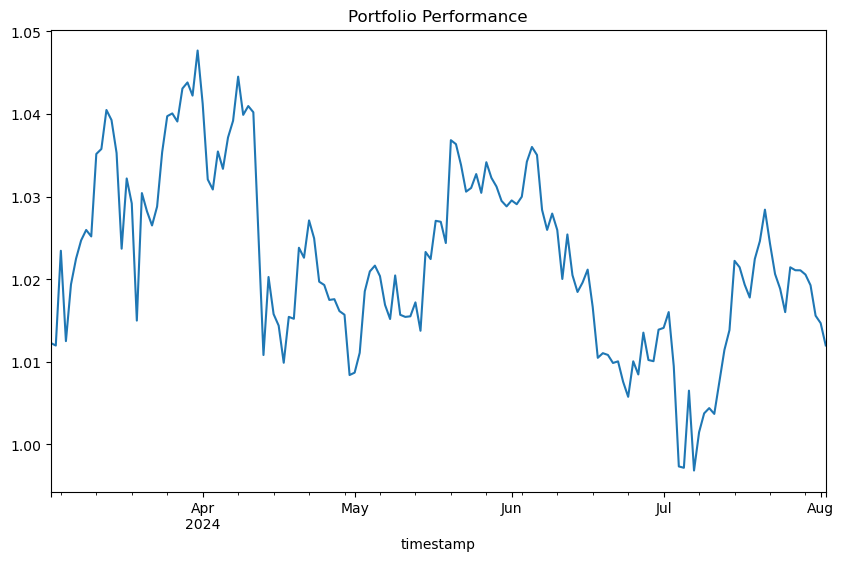

In [35]:
import pandas as pd
import ccxt
import datetime


# Getting the dataset from csv file
data = pd.read_csv('../data/crypto_top99_20240801.csv')
# Get the list from first column and convert it to list with capital letters

tickers = data['Symbol'].tolist()

# Created an alternative ticket list to compare the performance against the Crypto Top 100
tickers_crypto_top_100 = ['BTC',
           'ETH',
           'BNB',
           'SOL',
           'XRP',
           'ADA',
           'DOGE',
           'AVAX',
           'TRX',
           'LINK',
           'DOT',
           'TON',
           'MATIC',
           'SHIB',
           'LTC',
           'ICP',
           'BCH',
           'LEO',
           'UNI',
           'ATOM',
           'ETC',
           'XLM',
           'OKB',
           'INJ',
           'OP',
           'XMR',
           'APT',
           'NEAR',
           'FIL',
           'LDO',
           'TIA',
           'HBAR',
           'IMX',
           'ARB',
           'MNT',
           'CRO',
           'STX',
           'VET',
           'MKR',
           'SEI',
           'RNDR',
           'GRT',
           'RUNE',
           'AAVE',
           'EGLD',
           'ORDI',
           'ALGO',
           'QNT',
           'SUI',
           'FLOW',
           'MINA',
           '1000SATS',
           'AXS',
           'SNX',
           'HNT',
           'SAND',
           'FTM',
           'THETA',
           'KCS',
           'XTZ',
           'ASTR',
           'BEAM',
           'ETHDYDX',
           'CHZ',
           'MANA',
           'KAVA',
           'EOS',
           'NEO',
           'BLUR',
           'SC',
           'OSMO',
           'FLR',
           'KLAY',
           'BONK',
           'CFX',
           'IOTA',
           'WOO',
           'RON',
           'ROSE',
           'XDC',
           'CAKE',
           'GALA',
           'MANTA',
           'PYTH',
           'XEC',
           'RPL',
           'AR',
           'CRV',
           'AXL',
           'ENS',
           'GNO',
           'APE',
           'CSPR',
           'FET',
           'PENDLE',
           'UMA',
           'NEXO',
           'GMT',
           'PEPE',
           'TWT']



# Add the USDT to the tickers
tickers = [x + '/USDT' for x in tickers]

# Count the number of tickers
print(len(tickers))

# Initialiing the exchange
exchange = ccxt.binance()

# Function to fetch historical data
def fetch_historical_data(ticker, since):
    ohlcv = exchange.fetch_ohlcv(ticker, timeframe='1d', since=since)
    data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    data.set_index('timestamp', inplace=True)
    return data

# Defining the start date for the last x days
start_date = (datetime.datetime.now() - datetime.timedelta(days=500)).strftime('%Y-%m-%d')
since = int(datetime.datetime.strptime(start_date, '%Y-%m-%d').timestamp() * 1000)

# Fetch historical data for all tickers and store in a dictionary
historical_data = {}
for ticker in tickers:
    try:
        historical_data[ticker] = fetch_historical_data(ticker, since)
    except Exception as e:
        break

# Combining the closing prices of all tickers into a single DataFrame
close_prices = pd.DataFrame({ticker: data['close'] for ticker, data in historical_data.items()})

# Calculating daily returns
returns = close_prices.pct_change().dropna()
print(returns)

# Assuming each ticker has equal weight (1)
weights = pd.Series([1] * len(tickers), index=tickers)

# Calculating the portfolio daily returns
portfolio_returns = (returns * weights).sum(axis=1) / len(tickers)

# Calculating the cumulative performance of the portfolio
portfolio_performance = (1 + portfolio_returns).cumprod()

# Drawing the cumulative performance of the portfolio
portfolio_performance.plot(title='Portfolio Performance', figsize=(10, 6), legend=False)

In [24]:
portfolio_performance_df.head()

,timestamp,portfolio_performance
0,2024-01-03,0.998243
1,2024-01-04,0.999718
2,2024-01-05,0.999052
3,2024-01-06,0.997947
4,2024-01-07,0.997218


In [29]:
# Export the portfolio performance to a CSV file
portfolio_performance.to_csv('../data/portfolio_performance.csv')

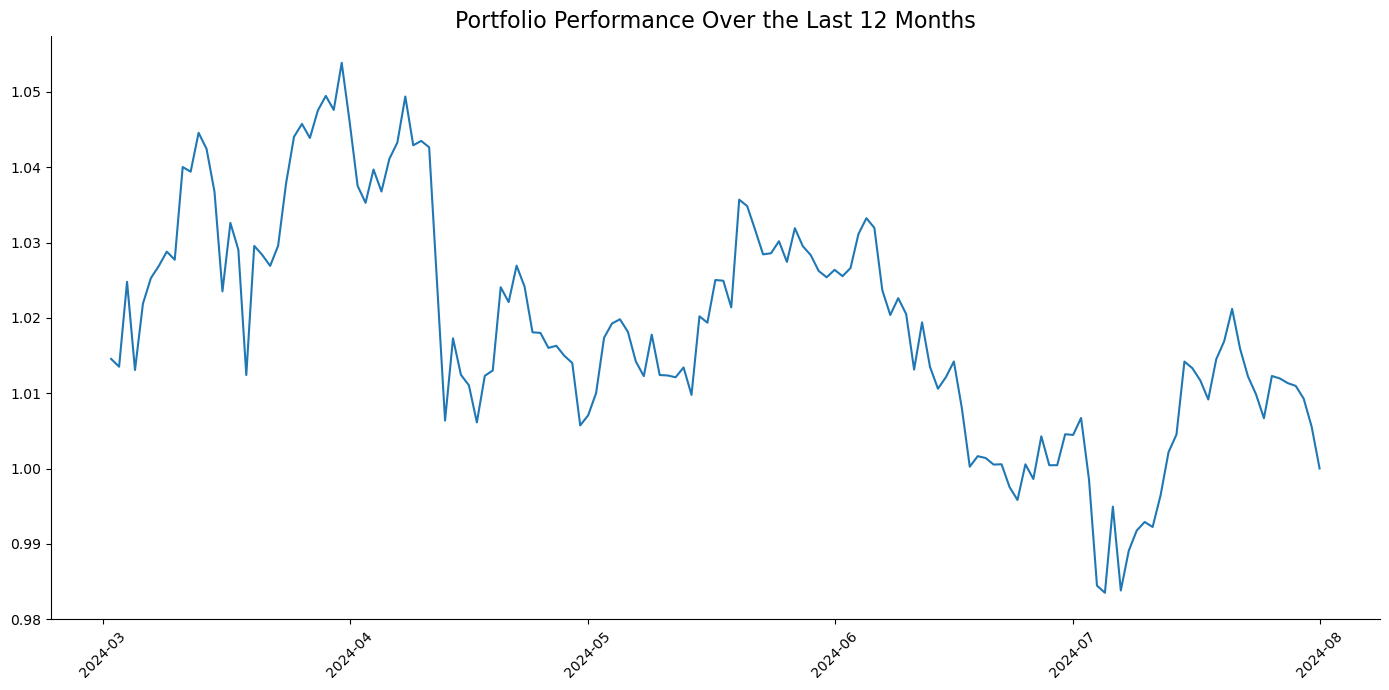

In [25]:
# First row of the portfolio performance
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting using Seaborn
portfolio_performance_df = portfolio_performance.reset_index()
portfolio_performance_df.columns = ['timestamp', 'portfolio_performance']

# Plotting using Seaborn

plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='portfolio_performance', data=portfolio_performance_df)
plt.title('Portfolio Performance Over the Last 12 Months', fontsize=16)

# Remove labels from axes
plt.xlabel('')
plt.ylabel('')

# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Cumulative Returns', fontsize=14)

# Remove the grid
plt.grid(False)

# Remove box
sns.despine()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()